<a href="https://colab.research.google.com/github/RaghavSrivastava25/INSAID-Fraud-Detetction/blob/main/INSAID_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
data = pd.read_csv('Fraud.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476031 entries, 0 to 5476030
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 459.6+ MB


In [74]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.476031e+06,5.476031e+06,5.476031e+06,5.476031e+06,5.476031e+06,5.476030e+06,5.476030e+06,5.476030e+06
mean,2.067619e+02,1.814751e+05,8.408795e+05,8.627927e+05,1.083631e+06,1.212756e+06,7.704487e-04,5.478421e-07
std,1.108914e+02,6.302258e+05,2.918383e+06,2.955212e+06,3.259971e+06,3.577704e+06,2.774626e-02,7.401635e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.380000e+02,1.335988e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.120000e+02,7.553500e+04,1.387600e+04,0.000000e+00,1.361415e+05,2.192008e+05,0.000000e+00,0.000000e+00
75%,3.020000e+02,2.097052e+05,1.073860e+05,1.450469e+05,9.467928e+05,1.119290e+06,0.000000e+00,0.000000e+00
max,3.790000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.555534e+08,3.555534e+08,1.000000e+00,1.000000e+00


In [75]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [76]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.037502,-0.003821,-0.003467,0.031929,0.032812,-0.005134,0.000269
amount,0.037502,1.000000,-0.007178,-0.009468,0.322392,0.497794,0.052075,0.002462
oldbalanceOrg,-0.003821,-0.007178,1.000000,0.999116,0.066903,0.040818,0.005716,0.000364
newbalanceOrig,-0.003467,-0.009468,0.999116,1.000000,0.068363,0.040699,-0.007334,0.000354
oldbalanceDest,0.031929,0.322392,0.066903,0.068363,1.000000,0.972567,-0.005260,-0.000246
newbalanceDest,0.032812,0.497794,0.040818,0.040699,0.972567,1.000000,-0.000419,-0.000251
isFraud,-0.005134,0.052075,0.005716,-0.007334,-0.005260,-0.000419,1.000000,0.026656
isFlaggedFraud,0.000269,0.002462,0.000364,0.000354,-0.000246,-0.000251,0.026656,1.000000


In [77]:
data.shape

(5476031, 11)

In [78]:
data = data.drop(columns=['oldbalanceOrg', 'oldbalanceDest', 'isFlaggedFraud', 'nameOrig', 'nameDest'])

In [93]:
Y = data['isFraud']
Y.shape
Y = Y[0:273801]
print(Y)

0         0.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
273796    0.0
273797    0.0
273798    0.0
273799    0.0
273800    0.0
Name: isFraud, Length: 273801, dtype: float64


In [94]:
X = data.drop(columns=['isFraud'])
X.shape
X = X[0:273801]
print(X)

        step      type     amount  newbalanceOrig  newbalanceDest
0          1   PAYMENT    9839.64       160296.36            0.00
1          1   PAYMENT    1864.28        19384.72            0.00
2          1  TRANSFER     181.00            0.00            0.00
3          1  CASH_OUT     181.00            0.00            0.00
4          1   PAYMENT   11668.14        29885.86            0.00
...      ...       ...        ...             ...             ...
273796    15   PAYMENT    8330.30       144930.49            0.00
273797    15   PAYMENT    5409.37       139521.13            0.00
273798    15  CASH_OUT   99779.11            0.00      2212133.42
273799    15  TRANSFER  602118.06            0.00      2159498.97
273800    15  TRANSFER  785386.41            0.00      1661117.89

[273801 rows x 5 columns]


In [95]:
for i in X['type']:
  if(i=="CASH-IN"):
    X['type']=1
  if(i=="CASH-OUT"):
    X['type']=2
  if(i=="DEBIT"):
    X['type']=3
  if(i=="PAYMENT"):
    X['type']=4
  if(i=="TRANSFER"):
    X['type']=5

In [96]:
print(X)

        step  type     amount  newbalanceOrig  newbalanceDest
0          1     5    9839.64       160296.36            0.00
1          1     5    1864.28        19384.72            0.00
2          1     5     181.00            0.00            0.00
3          1     5     181.00            0.00            0.00
4          1     5   11668.14        29885.86            0.00
...      ...   ...        ...             ...             ...
273796    15     5    8330.30       144930.49            0.00
273797    15     5    5409.37       139521.13            0.00
273798    15     5   99779.11            0.00      2212133.42
273799    15     5  602118.06            0.00      2159498.97
273800    15     5  785386.41            0.00      1661117.89

[273801 rows x 5 columns]


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
X_scaled.shape

[[-4.02194951  0.         -0.54406245 -0.2593447  -0.4589621 ]
 [-4.02194951  0.         -0.56988847 -0.3086802  -0.4589621 ]
 [-4.02194951  0.         -0.57533931 -0.31546711 -0.4589621 ]
 ...
 [ 1.55249602  0.         -0.25281808 -0.31546711  0.39037195]
 [ 1.55249602  0.          1.37386915 -0.31546711  0.3701633 ]
 [ 1.55249602  0.          1.96733356 -0.31546711  0.17881317]]


(273801, 5)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=123)

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [157]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[54735     0]
 [   25     1]]


In [149]:
from sklearn.metrics import classification_report
target_names = ['NF', 'F']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NF       1.00      1.00      1.00     54735
           F       1.00      0.04      0.07        26

    accuracy                           1.00     54761
   macro avg       1.00      0.52      0.54     54761
weighted avg       1.00      1.00      1.00     54761



In [150]:
import numpy as np
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print(np.mean(scores))
print(min(scores))
print(max(scores))

0.8406820001784798
0.4031786627694556
0.9997259773474607


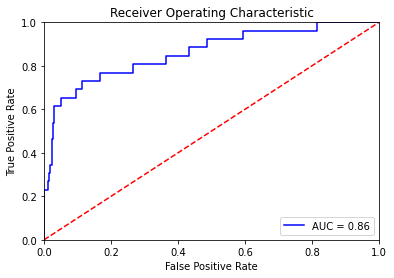

In [156]:
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()